## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
#read data values from the provided data.
df = pd.read_csv('ab_data.csv') 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
row_num = df.shape[0]
print("Total rows : {}".format(row_num))

Total rows : 294478


c. The number of unique users in the dataset.

In [6]:
user_total = df.nunique()['user_id']
print("all the Unique users are : {}".format(user_total))

all the Unique users are : 290584


d. The proportion of users converted.

In [7]:
print("Total proportion of Converted users :: {}%".format((df['converted'].mean())*100))

Total proportion of Converted users :: 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
mismatch_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("times the treatment group user lands incorrectly on old_page is :: {}".format(len(mismatch_grp1)))
mismatch_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("times the control group user incorrectly lands on new_page is :: {}".format(len(mismatch_grp2)))
print("times the new_page and treatment don't line up is :: {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

times the treatment group user lands incorrectly on old_page is :: 1965
times the control group user incorrectly lands on new_page is :: 1928
times the new_page and treatment don't line up is :: 3893


f. Do any of the rows have missing values?

In [9]:
df.info()
print ("no values are missing!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
no values are missing!


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df.to_csv('ab_edited.csv', index=False)
df2 = pd.read_csv('ab_edited.csv')

In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

3893

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
sum(df2['user_id'].duplicated())
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

22        767017
192       656468
226       773693
240       733976
246       704650
269       670052
276       784557
303       753749
308       857184
327       686623
357       856078
478       867227
490       808613
654       823319
655       726766
685       666385
703       859503
713       748761
753       646066
774       864223
776       820951
846       637639
850       793580
889       839954
981       727266
988       698120
1037      880442
1106      817911
1165      844879
1177      651511
           ...  
293443    738761
293449    715367
293480    638376
293530    934040
293544    817753
293548    797335
293568    704024
293604    648354
293628    700036
293657    914482
293659    691336
293662    927109
293706    795519
293712    811222
293773    688144
293817    876037
293888    865405
293894    741581
293917    738357
293980    916033
293996    942612
294014    813406
294200    928506
294252    892498
294253    886135
294308    905197
294309    787083
294328    6415

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
192,656468,2017-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2017-01-23 18:05:45.167335,control,old_page,1
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
246,704650,2017-01-04 19:10:52.655062,treatment,new_page,0
269,670052,2017-01-07 10:39:01.099851,control,old_page,0
276,784557,2017-01-04 10:39:41.450143,treatment,new_page,0
303,753749,2017-01-06 01:30:10.493842,control,old_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
time_dup = "2017-07-07 07:40:58.564783"
df2 = df2[df2.timestamp != time_dup]
df2.info()
len(df['user_id'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.5+ MB


290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df['converted'].mean()

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df_grp = df.groupby('group')
df_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    147202.0  0.120399  0.325429  0.0  0.0  0.0  0.0  1.0  147202.0   
treatment  147276.0  0.118920  0.323695  0.0  0.0  0.0  0.0  1.0  147276.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788123.098035  91278.896888  630002.0  709287.0  788053.5   
treatment  787825.226283  91142.800641  630000.0  708729.5  787837.5   

                                
                 75%       max  
group                           
control    867155.50  945998.0  
treatment  866693.75  945999.0

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
0.118920

0.11892

d. What is the probability that an individual received the new page?

In [19]:
new_user = len(df.query("group == 'treatment'"))
users=df.shape[0]
new_user_p = new_user/users
print(new_user_p)

0.5001256460584492


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From the above results we can see that the old page does better, but not at very big margin.
Probablity of individual converted in treatment group : 0.118920
Probablity of individual converted in control group : 0.120399
Due to inadequate information (factors such as change rate, test durations etc), we cannot clearly define that one page leads to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$ : $p_{old}$ >=  $p_{new}$ (null hypothesis)

$H_{1}$ : $p_{old}$ <  $p_{new}$** (alternative hypothesis)

In other words,
$H_{0}$ : $p_{new}$ <= $p_{old}$
$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
print(p_new)

0.11965919355605512


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
print(p_old)

0.11965919355605512


c. What is $n_{new}$?

In [22]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

147276


d. What is $n_{old}$?

In [23]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

147202


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# print(len(new_page_converted)) 

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]) #old page conversion.

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted = new_page_converted[:145274] #new page conversion

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    #calculated diff
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

histogram of the p_diffs


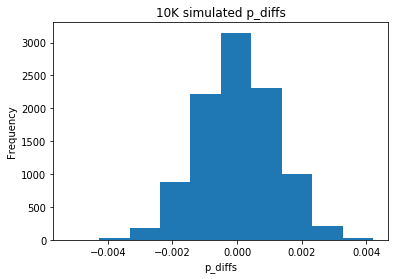

In [28]:
plt.hist(p_diffs)#plot of 10k simulated p-diffs
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('10K simulated p_diffs');
print ("histogram of the p_diffs")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff
p_diffs = np.array(p_diffs)
p_diffs
(act_diff < p_diffs).mean()

0.89529999999999998

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Above we calculated the p-values.
The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true 
Here we find and conclude that null hypothesis is true as old and new pages perform somewhat at par. The old pages performs just a little better than new pages**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#print zscore and pvalue.
print(z_score, p_value)

1.23692175473 0.891941933651


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z-score : 1.23692175473 
p-value : 0.891941933651
so we accept the null hypothesis.
Also as stated above we concluded that old page perform somewhat better than new pages.
Thus j and k findings align with our findings of the values.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regession will be performed.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results = logit.fit()
#result summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Feb 2018   Pseudo R-squ.:               7.093e-06
Time:                        21:01:02   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
treatment     -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

##ANSWER##
**null hypothesis : $H_{0}$ : $p_{new}$ - $p_{old}$ = 0
  Alternative hypothesis : $H_{1}$ : $p_{new}$ - $p_{old}$ != 0**
  
  As we can see that the null hypothesis in part II is 
$H_{0}$ : $p_{old}$ >=  $p_{new}$
$H_{1}$ : $p_{old}$ <  $p_{new}$
In other words,
$H_{0}$ : $p_{new}$ <= $p_{old}$
$H_{1}$ : $p_{new}$ > $p_{old}$
 is a case where we were using comparator in the Hypothesis cases as compared to the part III where we define a value by using a operator between p-old and p-new. Which alternatively concluded to te fact of old page being slightly more better performing than the new one.! 
 
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
Yes, we should be considering other things as they might also play a key role in influencing the conversions.
for example customer segment could create a change aversion. The disadvantages of adding additional terms into the regression model is that even with considering additional factors we can never account all influencing factors which might be creating some sort of aversion in the final decision.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv') #reading countries data
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0


In [36]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
#dfnew country
df_new['country'].astype(str).value_counts()

US    206364
UK     73419
CA     14695
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
df['intercept'] = 1
#log_mod
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
#printing out the summary of the results.
results.summary()

Optimization terminated successfully.
         Current function value: 0.447286
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Feb 2018   Pseudo R-squ.:                 -0.2213
Time:                        21:01:04   Log-Likelihood:            -1.3172e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0319      0.026    -78.845      0.000      -2.082      -1.981
US            -1.9962      0.007   -294.261      0.000      -2.010      -1.983
==============================================================================
"""

In [38]:
np.exp(results.params)


CA    0.131081
US    0.135847
dtype: float64

In [39]:
1/_

0.00010001000100010001

In [40]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 8 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
intercept       294478 non-null int64
control         294478 non-null uint8
treatment       294478 non-null uint8
dtypes: int64(3), object(3), uint8(2)
memory usage: 14.0+ MB


**Conclusion (Regression) :: **
As we can see that using logistic regression above computation shows us that there is not much of difference between the conversion rate of each treatment and control group. So the null hypothesis (H0) is accepted !




<a id='conclusions'></a>
## Conclusions

The performance of the old page was found just a little bit better as computed by different techniques, So we will accept the null hypothesis and reject the alternative hypothesis.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

**Resources**
1. ALl the links in the nanodegree courses as well as slack community.
2. https://stackoverflow.com/questions/15109165/loading-a-dataset-from-file-to-use-with-sklearn
3. https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
4. http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
5. http://interactivepython.org/runestone/static/pip2/Functions/Returningavaluefromafunction.html
and some of the casual definitions and concepts searched on google.